<a href="https://colab.research.google.com/github/soy-esaul/Ejercicios-RNA/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerías:
# Numpy para manejo de arreglos
# Sequential para el modelo feedforward simple
# Dense para capas con una matriz de pesos completa
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
 
# El conjunto de entrenamiento está dado por pares de valores
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

target_data = np.array([[0],[1],[1],[0]], "float32")

# Creamos el modleo de tipo secuencial
model = Sequential()

# Agregamos una capa densa con 16 salidas y 2 inputs, la función de activación es ReLU
model.add(Dense(16, input_dim=2, activation='relu'))
# Se agrega una capa densa más, esta tiene sólo un nodo y la función de activación es sigmoide
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Se define el modelo con una funcióón de costo, un optimizador 
# y un conjunto de métricas
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=100, verbose=0)
 
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)
 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

1/1 [==============================] - 0s 156ms/step - loss: 0.2333 - binary_accuracy: 0.7500

binary_accuracy: 75.00%
[[1.]
 [1.]
 [1.]
 [0.]]


In [ ]:
# Se define el modelo con una función de costo, un optimizador 
# y un conjunto de métricas
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=100, verbose=0)
 
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)
 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

1/1 [==============================] - 0s 171ms/step - loss: 0.5958 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
[[0.]
 [1.]
 [1.]
 [0.]]


# Ejercicios

1. ¿Qué única variable debes modificar para mejorar la predicción en el código anterior?

2. Crea un modelo LSTM en keras llamado ```model_lstm```. Este modelo debe tener la misma función de activación en todas las capas, una arquitectura 4, 3, 2, 1.

3. Crea un pandas dataframe con el archivo ```airline-passengers``` que esta en la carpeta de Ejercicios.

4. Grafica los datos del dataframe con la misma librería de pandas

5. Crea un modelo lstm para hacer una predicción de estos datos. Puedes basarte en este tutorial:

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

6. Explica el modelo



## Ejercicio 1


La variable que se puede cambiar es el tipo de error usado de ```mean_squared_error``` a ```binary_crossentropy```, ya que se trata de un problema de clasificación binaria, en el que es más conveniente penalizar de distinta manera los valores que más se alejen de los dos objetivos 0 y 1.

## Ejercicio 2

In [ ]:
# Importamos la capa del tipo LSTM de Keras
from keras.layers import LSTM

# Creamos el modelo de topi secuencial
model_lstm = Sequential()
# Agregamos la primera capa de tipo LSTM de tamaño 3 con 4 entradas
# El parámetro return_sequences=True sirve para que la salida tenga dimensión 4
model_lstm.add(LSTM(3, input_dim=4, activation='sigmoid', return_sequences=True))
# Creamos otra capa LSTM de tamaño 2
model_lstm.add(LSTM(2, activation='sigmoid'))
# Finalmente creamos una capa densa con una neurona
model_lstm.add(Dense(1,activation='sigmoid'))

## Ejercicio 3

In [ ]:
# Importamos Pandas como pd
import pandas as pd

# Con la función read_csv convertimos el .CSV en un DataFrame
dataset = pd.read_csv('airline-passengers.csv')
dataset

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Ejercicio 4

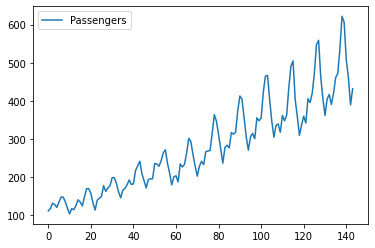

In [ ]:
# Usamos el método plot para DataFrames de la librería Pandas:
dataset.plot()

## Ejercicio 5

In [ ]:
# Lo primero es preparar los datos para que puedan ser tomados como entrada por la red
# Para esto los convertimos primero en un array de numpy, sin usar las fechas:
data = dataset.values[:,1]
data = data.astype('float32')

In [ ]:
# Para poder trabajar mejor con la función sigmoide, escalamos los datos al rango [0,1]
data = np.divide(data,np.max(data))

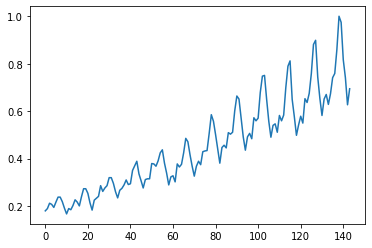

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)

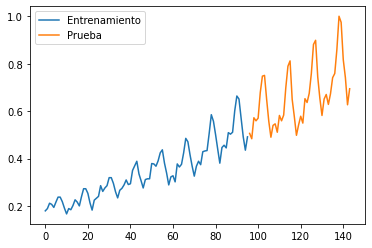

In [ ]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y otro de prueba
# Usaremos 2/3 y 1/3 de los datos respectivamente
train_length = int(0.67*len(data))
test_length = len(data) - train_length
train_set = data[:train_length]
test_set = data[train_length:]

plt.plot(train_set)
test_positions = [i for i in range(train_length,len(dataset))]
plt.plot(test_positions,test_set)
plt.legend(['Entrenamiento', 'Prueba'])
plt.show()

A continuación, definimos uan función que nos ayudará a convertir nuestro conjunto de datos en un conjunto de pares, donde el primer elemento corresponderá a la observación al tiempo $t$, mientras que el segundo elemento será la observación al tiempo $t-1$.

In [ ]:
def create_dataset(dataset, look_back=1):
  '''
  Esta función crea dos salidas, en la primera se encuentra un arreglo cuyas
  columnas son el conjunto de datos con un desfase de 1 por cada posición que se
  recorre hacia la derecha. En la segunda variable de salida se encuentra el conjunto
  de datos desplazado la cantidad de veces que se indica en el argumento look_back
  '''
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back)]
    dataX.append(a)
    dataY.append(dataset[i + look_back])
  return np.array(dataX), np.array(dataY)

In [ ]:
# Como queremos predecir un paso en el futuro, definimos la variable look_back igual a 1
look_back = 1

# Ahora creamos los conjuntos de entrenamiento y prueba con la función anterior:
trainX, trainY = create_dataset(train_set, look_back)
testX, testY = create_dataset(test_set, look_back)

In [ ]:
# Keras espera una entrada de forma (muestras, desfase, variables), entonces modificamos
# los conjuntos de datos para que cumplan con estas características. En este caso,
# el desfase lo hemos definido igual a 1, las muestras u observaciones son la cantidad total
# de datos, y hay sólo una variable (el número de columnas del dataset)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Creamos ahora nuestra red neuronal LSTM en Keras
# El modelo tendrá 4 módulos LSTM, un nodo de entrada y uno de salida

model_1 = Sequential()
model_1.add(LSTM(4, input_shape=(1,1)))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.1034
Epoch 2/100
94/94 - 0s - loss: 0.0453
Epoch 3/100
94/94 - 0s - loss: 0.0200
Epoch 4/100
94/94 - 0s - loss: 0.0128
Epoch 5/100
94/94 - 0s - loss: 0.0115
Epoch 6/100
94/94 - 0s - loss: 0.0111
Epoch 7/100
94/94 - 0s - loss: 0.0108
Epoch 8/100
94/94 - 0s - loss: 0.0105
Epoch 9/100
94/94 - 0s - loss: 0.0102
Epoch 10/100
94/94 - 0s - loss: 0.0099
Epoch 11/100
94/94 - 0s - loss: 0.0095
Epoch 12/100
94/94 - 0s - loss: 0.0092
Epoch 13/100
94/94 - 0s - loss: 0.0088
Epoch 14/100
94/94 - 0s - loss: 0.0085
Epoch 15/100
94/94 - 0s - loss: 0.0082
Epoch 16/100
94/94 - 0s - loss: 0.0079
Epoch 17/100
94/94 - 0s - loss: 0.0075
Epoch 18/100
94/94 - 0s - loss: 0.0071
Epoch 19/100
94/94 - 0s - loss: 0.0068
Epoch 20/100
94/94 - 0s - loss: 0.0064
Epoch 21/100
94/94 - 0s - loss: 0.0061
Epoch 22/100
94/94 - 0s - loss: 0.0056
Epoch 23/100
94/94 - 0s - loss: 0.0053
Epoch 24/100
94/94 - 0s - loss: 0.0048
Epoch 25/100
94/94 - 0s - loss: 0.0044
Epoch 26/100
94/94 - 0s - loss: 0.

In [ ]:
# Predecimos los valores para los conjuntos de entrenamiento y comprobación
train_predict = model_1.predict(trainX)
test_predict = model_1.predict(testX)

# Reescalamos los conjuntos a sus valores originales
train_predict = np.multiply(train_predict,np.max(dataset.values[:,1]))
test_predict = np.multiply(test_predict,np.max(dataset.values[:,1]))
trainY = np.multiply(trainY,np.max(dataset.values[:,1]))
testY = np.multiply(testY,np.max(dataset.values[:,1]))

In [ ]:
# Importamos librerías para evaluar el comportamiento de la red
import math
from sklearn.metrics import mean_squared_error

# Calcular error cuadrático medio
train_score = math.sqrt(mean_squared_error(trainY, train_predict))
test_score = math.sqrt(mean_squared_error(testY, test_predict))
print('Error del entrenamiento: ', train_score,
      '\nError de la evaluación: ',test_score)

Error del entrenamiento:  22.771822680741323 
Error de la evaluación:  48.221575176470544


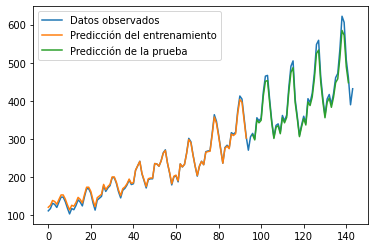

In [ ]:
# Graficamos los valores observados y la predicción para cada uno de los conjuntos
plt.plot(dataset.values[:,1])
plt.plot(train_predict)
pred_positions = [i for i in range(train_length, train_length + len(test_predict[:,0]))]
plt.plot(pred_positions, test_predict)
plt.legend(['Datos observados','Predicción del entrenamiento', 'Predicción de la prueba'])
plt.show()

## Ejercicio 6

El modelo creado tiene tres capas, una es la entrada, que recibe los valores decl conjunto de datos, otra de ellas es oculta con cuatro módulos ```LSTM```, y la última es la capa de salida, que recibe las salidas de los módulos ```LSTM```. La entrada de la red es una lista de valores secuenciales, de manera que el valor al tiempo $t+1$ depende del valor al tiempo $t$ y puede depender también de los valores previos, esta dependencia es aprendida por la red al modificar los pesos para minimizar el error dado el conjunto de entrenamiento. Luego, cuando se toma otro conjunto de valores para producir una predicción (el conjunto de comprobación), este es pasado por la red con los parámetros ajustados, gracias a esto se puede producir una salida que se ajusta a las características de la serie.